<a href="https://colab.research.google.com/github/LondheShubham153/deep_learning/blob/main/Mnist_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries
- Dataset
- Model Building
- Visualizations

In [ ]:
from keras.datasets import mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


Loading dataset

In [ ]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


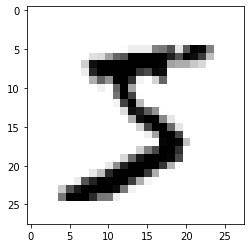

In [ ]:
plt.imshow(train_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [ ]:
train_X.shape

(60000, 28, 28, 1)

Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

One hot Encoding - as we can't work with categorical data directly

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

Training the Model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 84s 89ms/step - loss: 0.1490 - accuracy: 0.9538
Epoch 2/5
938/938 [==============================] - 82s 87ms/step - loss: 0.0502 - accuracy: 0.9843
Epoch 3/5
938/938 [==============================] - 80s 86ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 81s 86ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 81s 87ms/step - loss: 0.0226 - accuracy: 0.9929


We can see that the accuracy is 91% so we can see the metrics as well

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0316 - accuracy: 0.9908
Test loss 0.03155423328280449
Test accuracy 0.9908000230789185


Making some predictions:)

In [ ]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

7


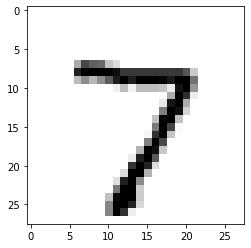

In [ ]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

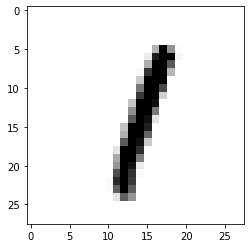

In [ ]:
plt.imshow(test_X[5].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

So the model correctly classifies the images in our testing data set